In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np


base_model = keras.applications.ResNet50(
    weights='imagenet',      
    include_top=False,       
    input_shape=(512, 512, 3)  
)

base_model.trainable = False

print(f"Base model loaded with {len(base_model.layers)} layers")

model = keras.Sequential([
    base_model,                                    
    layers.GlobalAveragePooling2D(),               
    layers.Dense(256, activation='relu'),       
    layers.Dropout(0.5),                          
    layers.Dense(45, activation='sigmoid')         
])

model.summary()

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',  
    metrics=['accuracy', keras.metrics.AUC(name='auc')]
)

print("Model compiled successfully!")



Base model loaded with 175 layers


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 16, 16, 2048)   │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 45)             │        11,565 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,123,821 (92.03 MB)

 Trainable params: 536,109 (2.05 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

Model compiled successfully!


In [7]:
X_train = np.load('../data/processed/X_train.npy')
y_train = np.load('../data/processed/y_train.npy')
X_val = np.load('../data/processed/X_val.npy')
y_val = np.load('../data/processed/y_val.npy')

history = model.fit(
    X_train, y_train,                    # Training data
    validation_data=(X_val, y_val),      # Validation data
    epochs=10,                            # Number of times to go through entire dataset
    batch_size=32,                        # Process 32 images at a time
    verbose=1                             # Show progress bar
)

Epoch 1/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 115s 2s/step - accuracy: 0.0651 - auc: 0.6064 - loss: 0.3350 - val_accuracy: 0.3984 - val_auc: 0.8442 - val_loss: 0.0962
Epoch 2/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 111s 2s/step - accuracy: 0.1523 - auc: 0.7440 - loss: 0.1121 - val_accuracy: 0.4089 - val_auc: 0.8587 - val_loss: 0.0937
Epoch 3/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 112s 2s/step - accuracy: 0.1911 - auc: 0.7808 - loss: 0.1076 - val_accuracy: 0.1042 - val_auc: 0.8520 - val_loss: 0.0958
Epoch 4/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 112s 2s/step - accuracy: 0.1638 - auc: 0.8098 - loss: 0.1004 - val_accuracy: 0.4115 - val_auc: 0.8619 - val_loss: 0.0935
Epoch 5/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 114s 2s/step - accuracy: 0.1884 - auc: 0.8166 - loss: 0.1015 - val_accuracy: 0.4193 - val_auc: 0.8566 - val_loss: 0.0951
Epoch 6/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 113s 2s/step - accuracy: 0.1954 - auc: 0.8197 - loss: 0.0952 - val_accuracy: 0.4115 - val_auc: 0.8599 - val_loss: 0.0934
Epoch 7/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 169s 4s/

In [8]:
model.save('../models/retinal_disease_classifier.keras')
print("Model saved!")

Model saved!


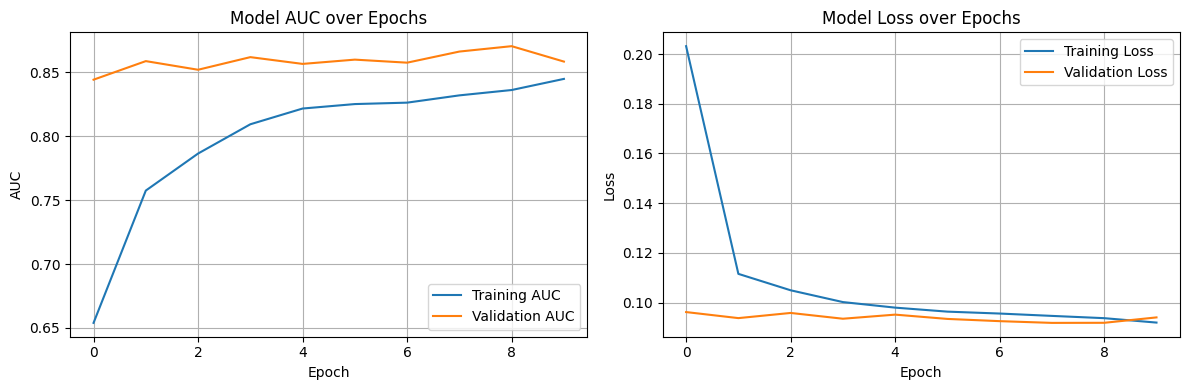

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['auc'], label='Training AUC')
plt.plot(history.history['val_auc'], label='Validation AUC')
plt.title('Model AUC over Epochs')
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig('../results/training_history.png')
plt.show()